In [1]:
# Pandas, Matplotlib, and Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("/content/fcc-forum-pageviews.csv")
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [72]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [73]:
df_copy = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [74]:
df_copy.tail()

,value
date,
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-03,158549


In [75]:
less_25 = df['value'] >= df['value'].quantile(0.025)

In [76]:
more_25 = df['value'] <= df['value'].quantile(0.975)

In [77]:
more_25.tail(5)

,value
date,
2019-11-29,True
2019-11-30,True
2019-12-01,True
2019-12-02,False
2019-12-03,True


In [78]:
df_clean = df.loc[(less_25 & more_25)]

In [80]:
df_clean.tail()

,value
date,
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-03,158549


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [81]:
def draw_line_plot():
  fig, axes = plt.subplots(figsize=(10,5), dpi=100)
  axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  axes.set_xlabel('Date')
  axes.set_ylabel('Page Views')
  sns.lineplot(data=df_clean, legend=False)
  plt.show()

  fig.savefig('line_plot.png')
  return fig

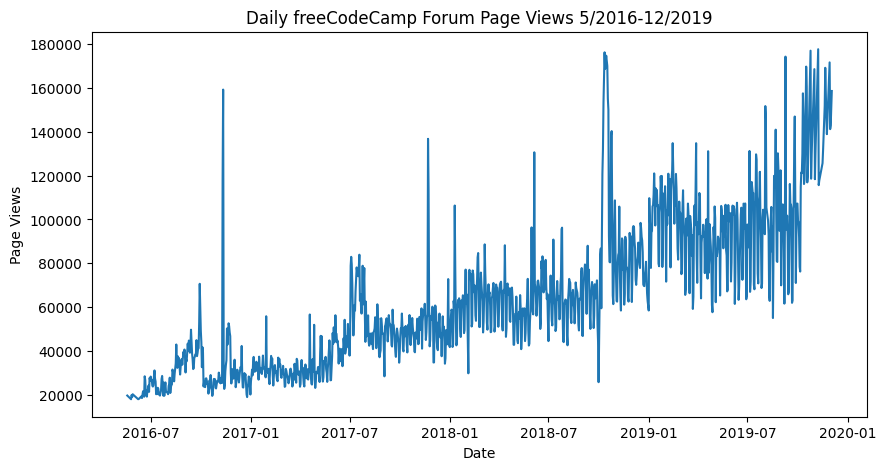

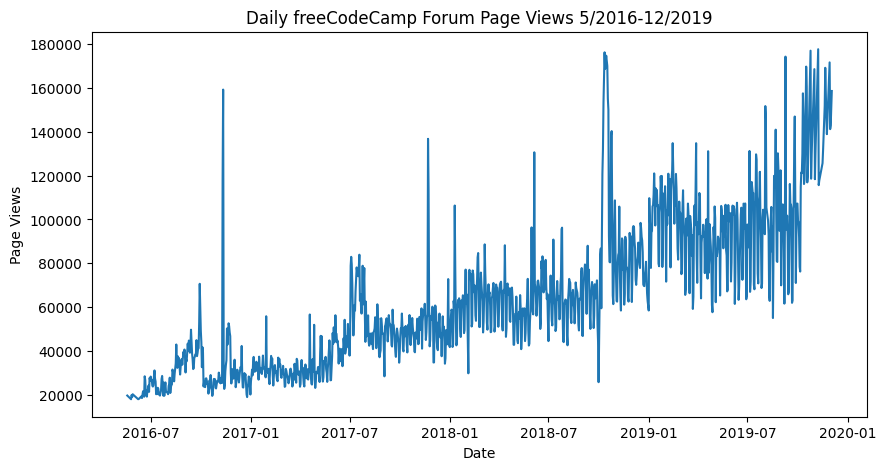

In [82]:
draw_line_plot()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [83]:
def draw_bar_plot():
  df_bar = df_clean.copy()
  df_bar["Years"] = df_bar.index.year
  df_bar["Months"] = df_bar.index.month_name()

  df_bar = df_bar.groupby(['Years', 'Months'], sort=False)['value'].mean().round().astype(int)
  df_bar = pd.DataFrame(df_bar)
  df_bar = df_bar.rename(columns={'value': 'Average Page Views'})
  df_bar = df_bar.reset_index()

  missing_data = {
      "Years": [2016, 2016, 2016, 2016],
      "Months": ['January', 'February', 'March', 'April'],
      "Average Page Views": [0, 0, 0, 0]
  }
  df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
  fig, axes = plt.subplots(figsize=(19.2, 10.8), dpi=100)
  axes.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

  chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


  fig.savefig('bar_plot.png')
  return fig

/tmp/ipython-input-962036759.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


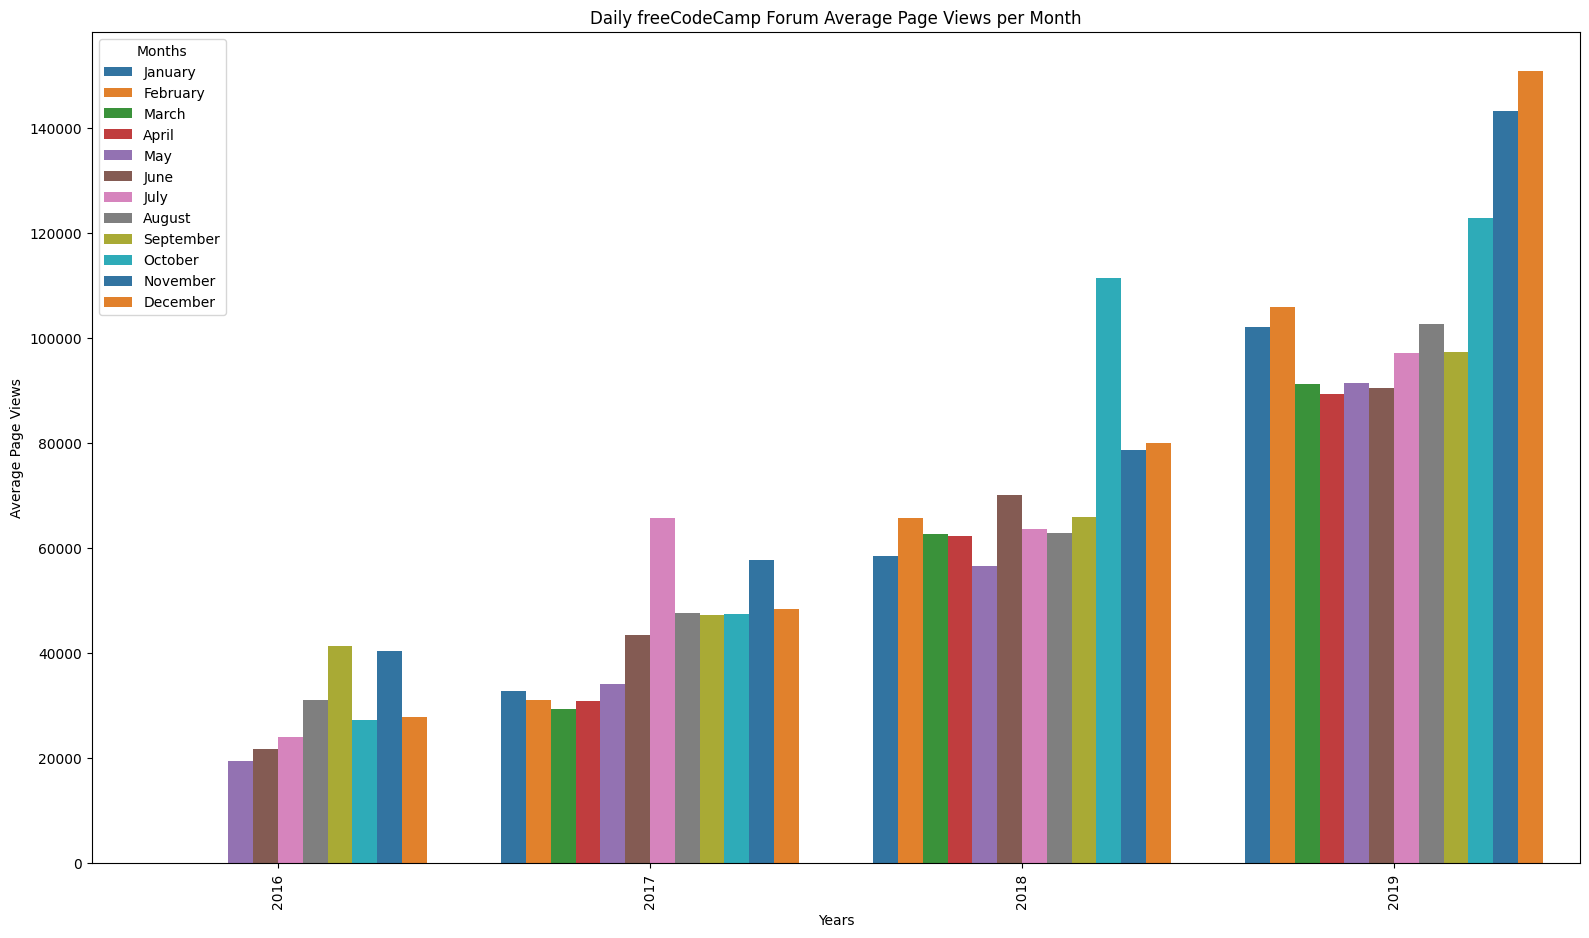

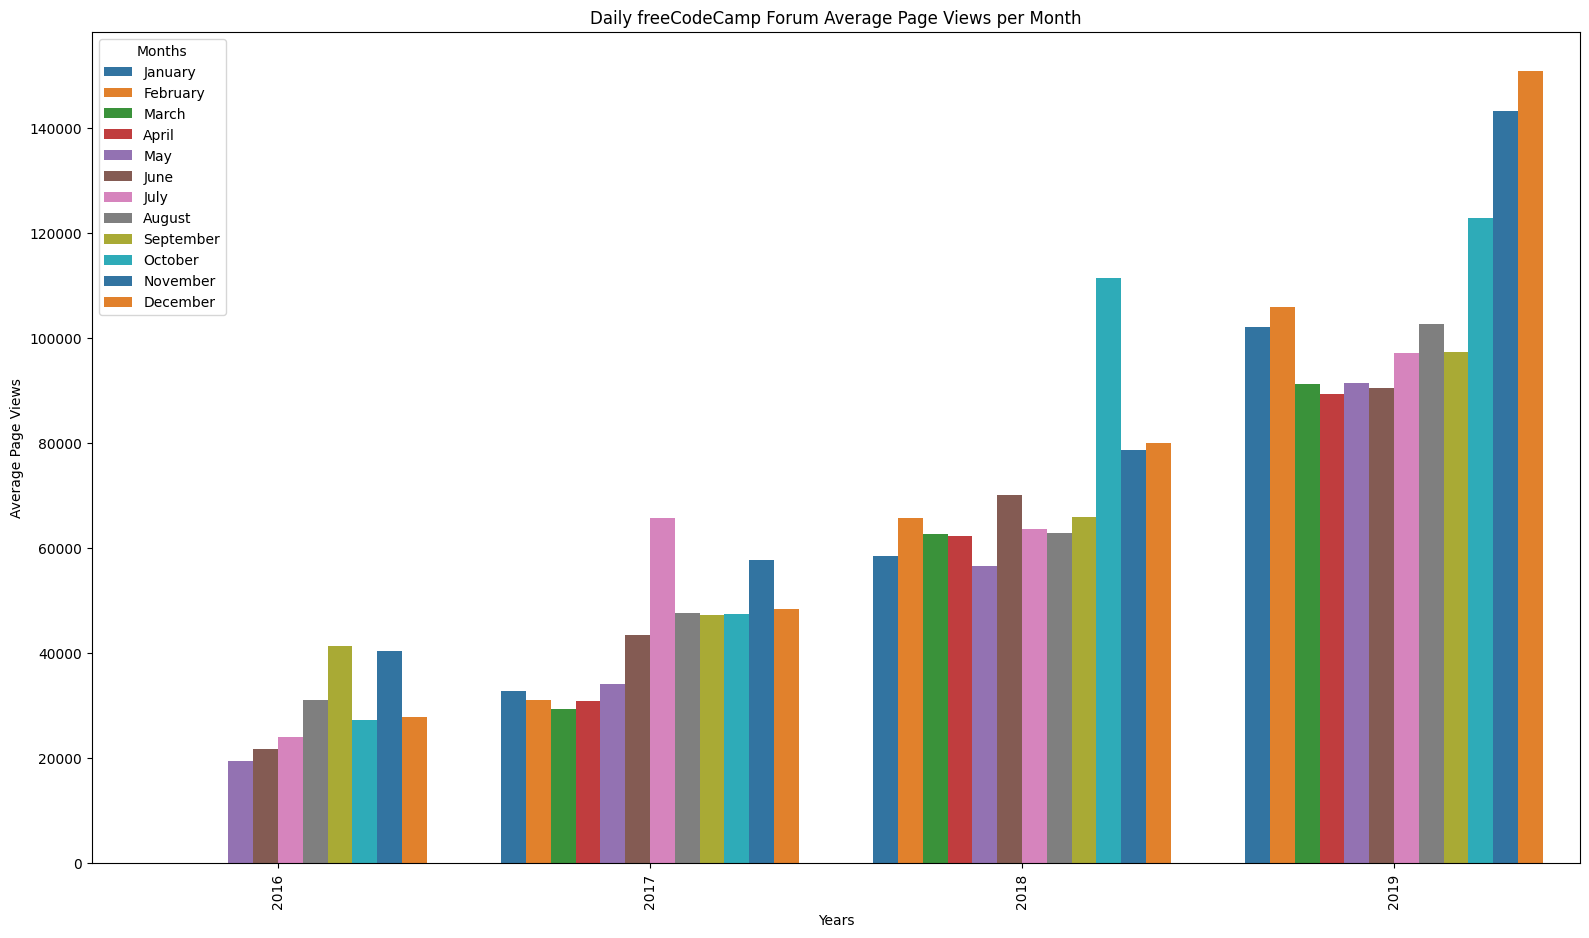

In [84]:
draw_bar_plot()

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [87]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

    # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Monthly boxplot
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig('box_plot.png')
    return fig

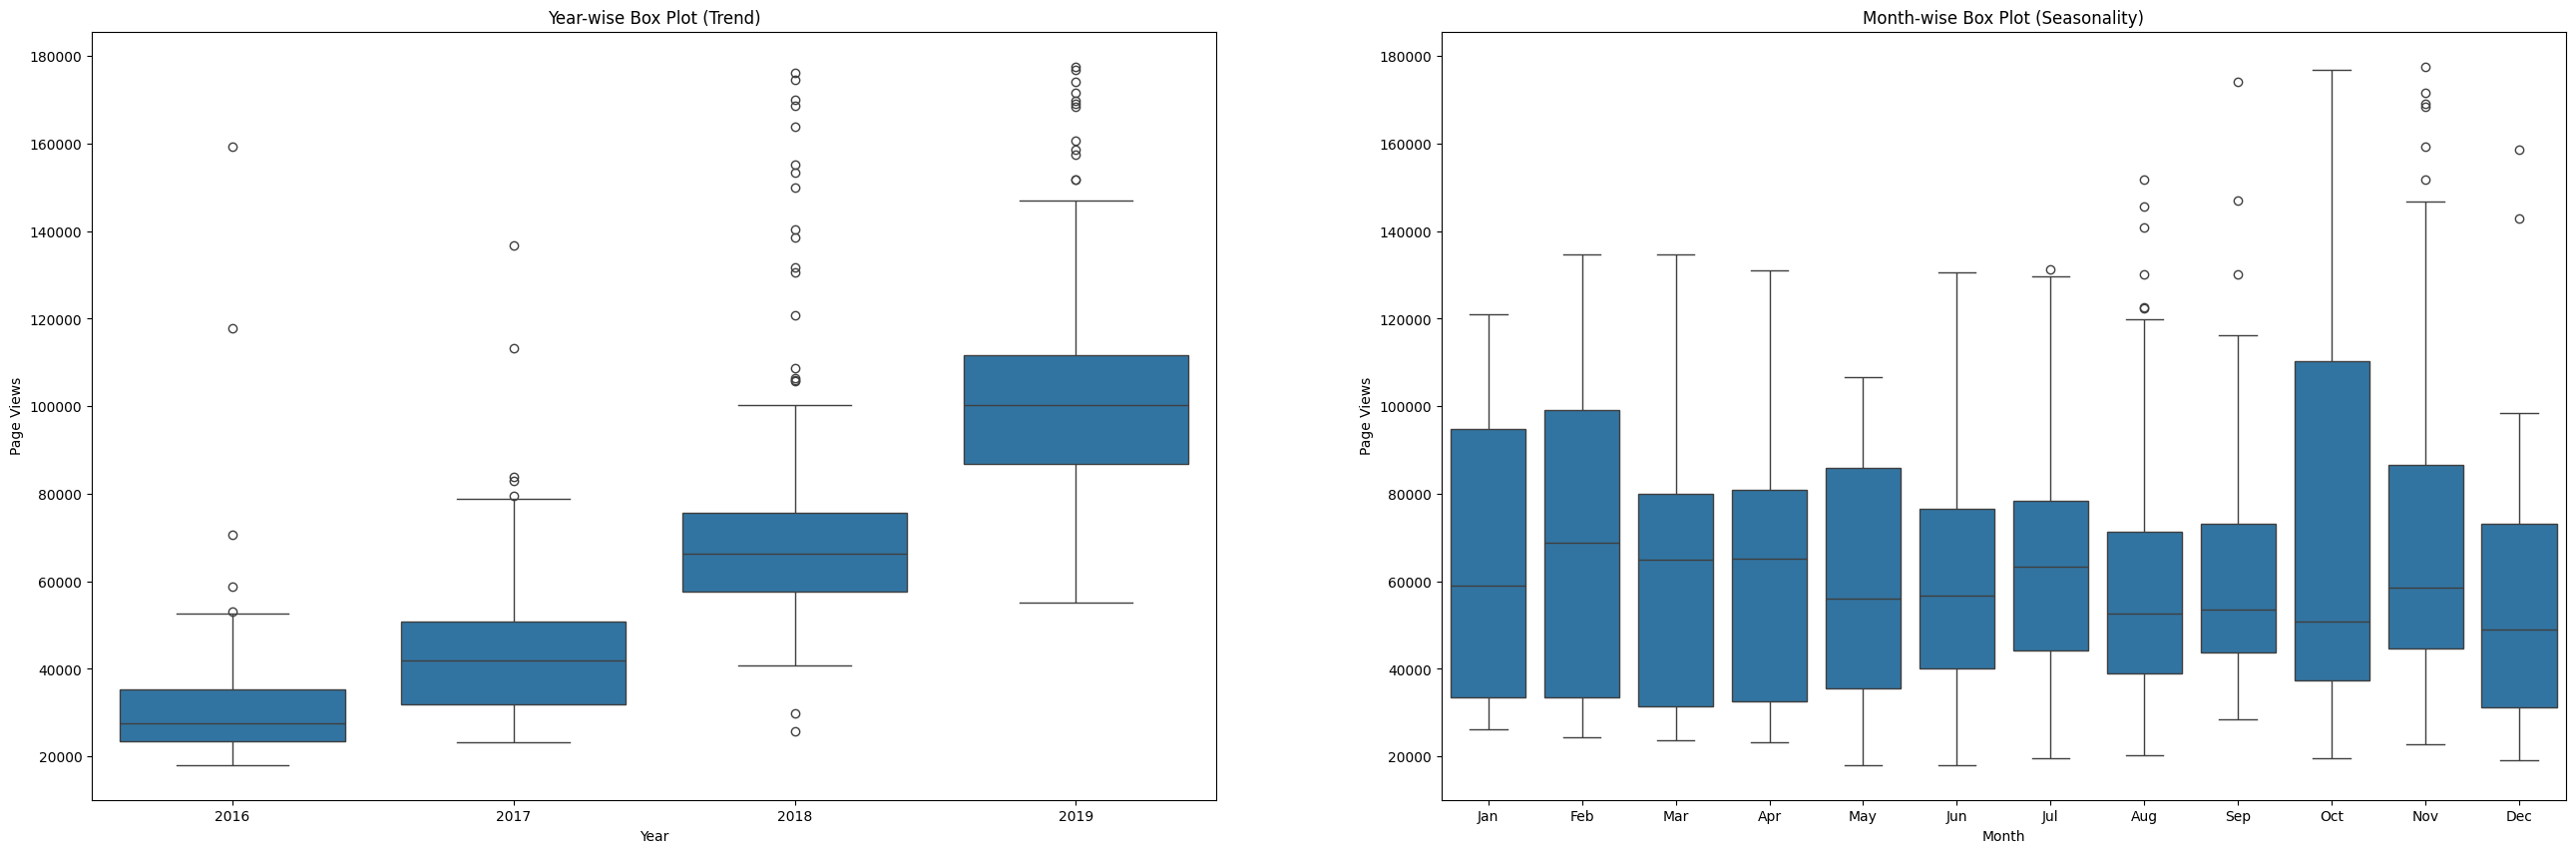

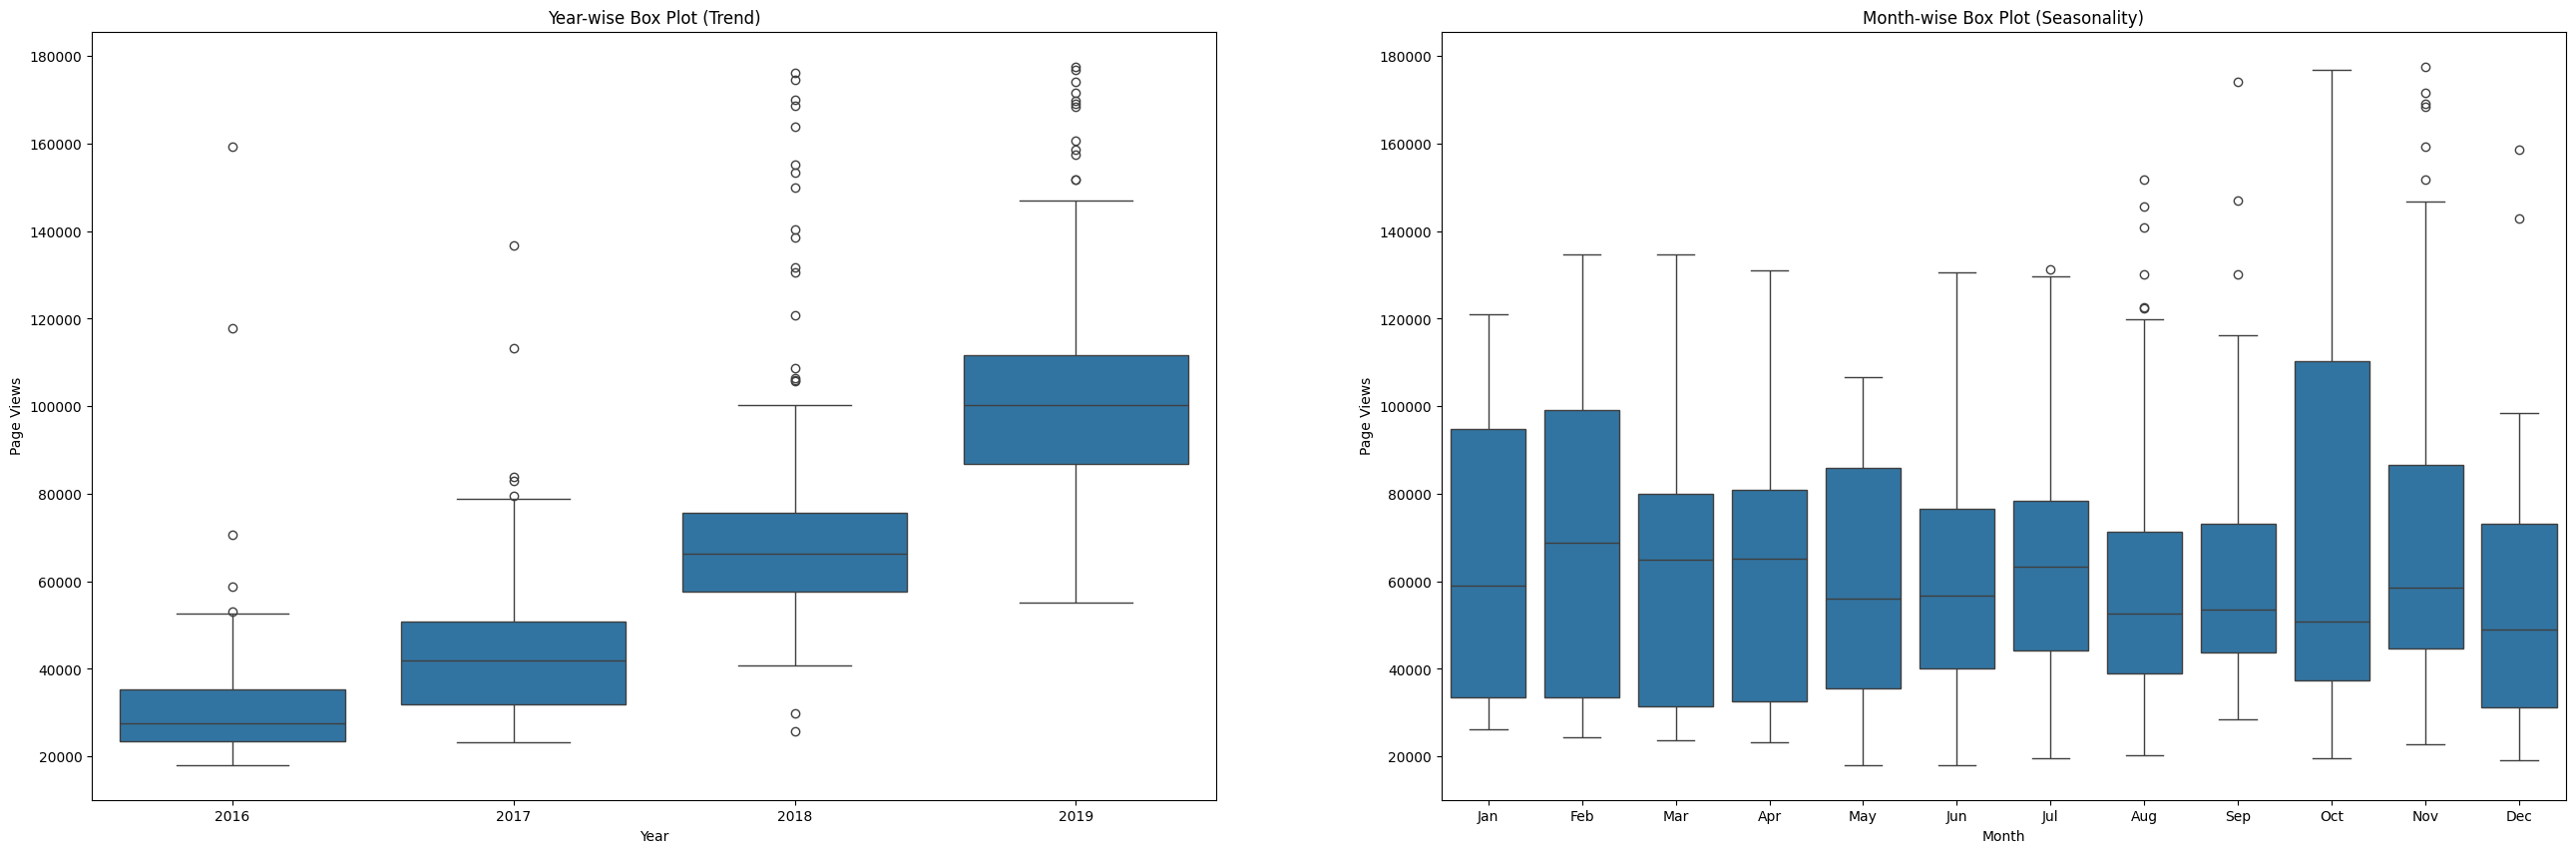

In [88]:
draw_box_plot()

## Combine

In [89]:
# Pandas, Matplotlib, and Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/fcc-forum-pageviews.csv")


#Set the index to the date column.
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')


#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
less_25 = df['value'] >= df['value'].quantile(0.025)
more_25 = df['value'] <= df['value'].quantile(0.975)

df_clean = df.loc[(less_25 & more_25)]

# Create a draw_line_plot function
def draw_line_plot():
  fig, axes = plt.subplots(figsize=(10,5), dpi=100)
  axes.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  axes.set_xlabel('Date')
  axes.set_ylabel('Page Views')
  sns.lineplot(data=df_clean, legend=False)
  plt.show()

  fig.savefig('line_plot.png')
  return fig

#Create a draw_bar_plot function
def draw_bar_plot():
  df_bar = df_clean.copy()
  df_bar["Years"] = df_bar.index.year
  df_bar["Months"] = df_bar.index.month_name()

  df_bar = df_bar.groupby(['Years', 'Months'], sort=False)['value'].mean().round().astype(int)
  df_bar = pd.DataFrame(df_bar)
  df_bar = df_bar.rename(columns={'value': 'Average Page Views'})
  df_bar = df_bar.reset_index()

  missing_data = {
      "Years": [2016, 2016, 2016, 2016],
      "Months": ['January', 'February', 'March', 'April'],
      "Average Page Views": [0, 0, 0, 0]
  }
  df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
  fig, axes = plt.subplots(figsize=(19.2, 10.8), dpi=100)
  axes.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

  chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


  fig.savefig('bar_plot.png')
  return fig

#Create a draw_box_plot function
def draw_box_plot():
    df_box = df_clean.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)

    # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    # Monthly boxplot
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig('box_plot.png')
    return fig

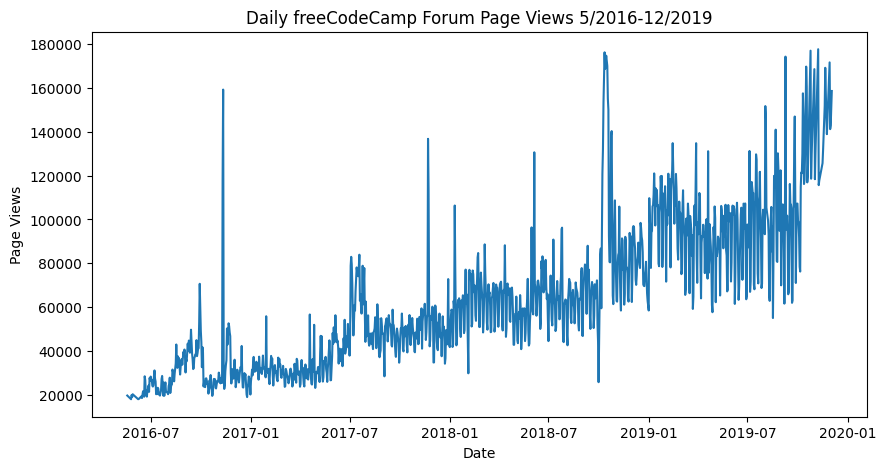

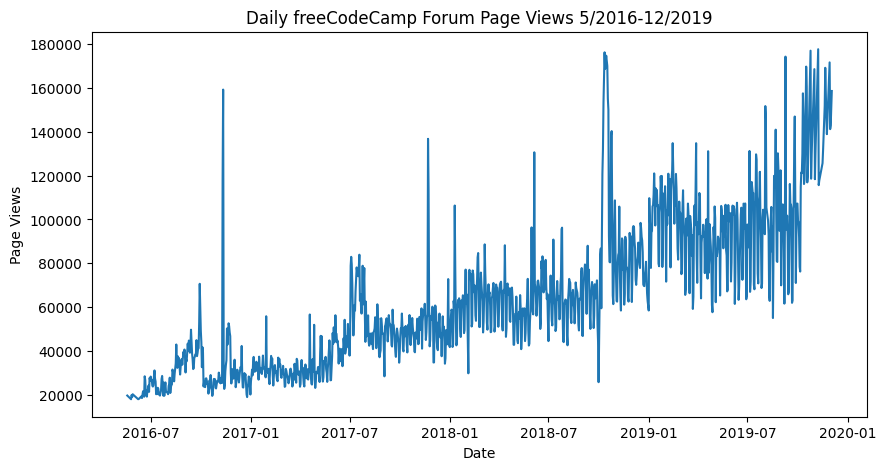

In [90]:
draw_line_plot()

/tmp/ipython-input-2113524700.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')


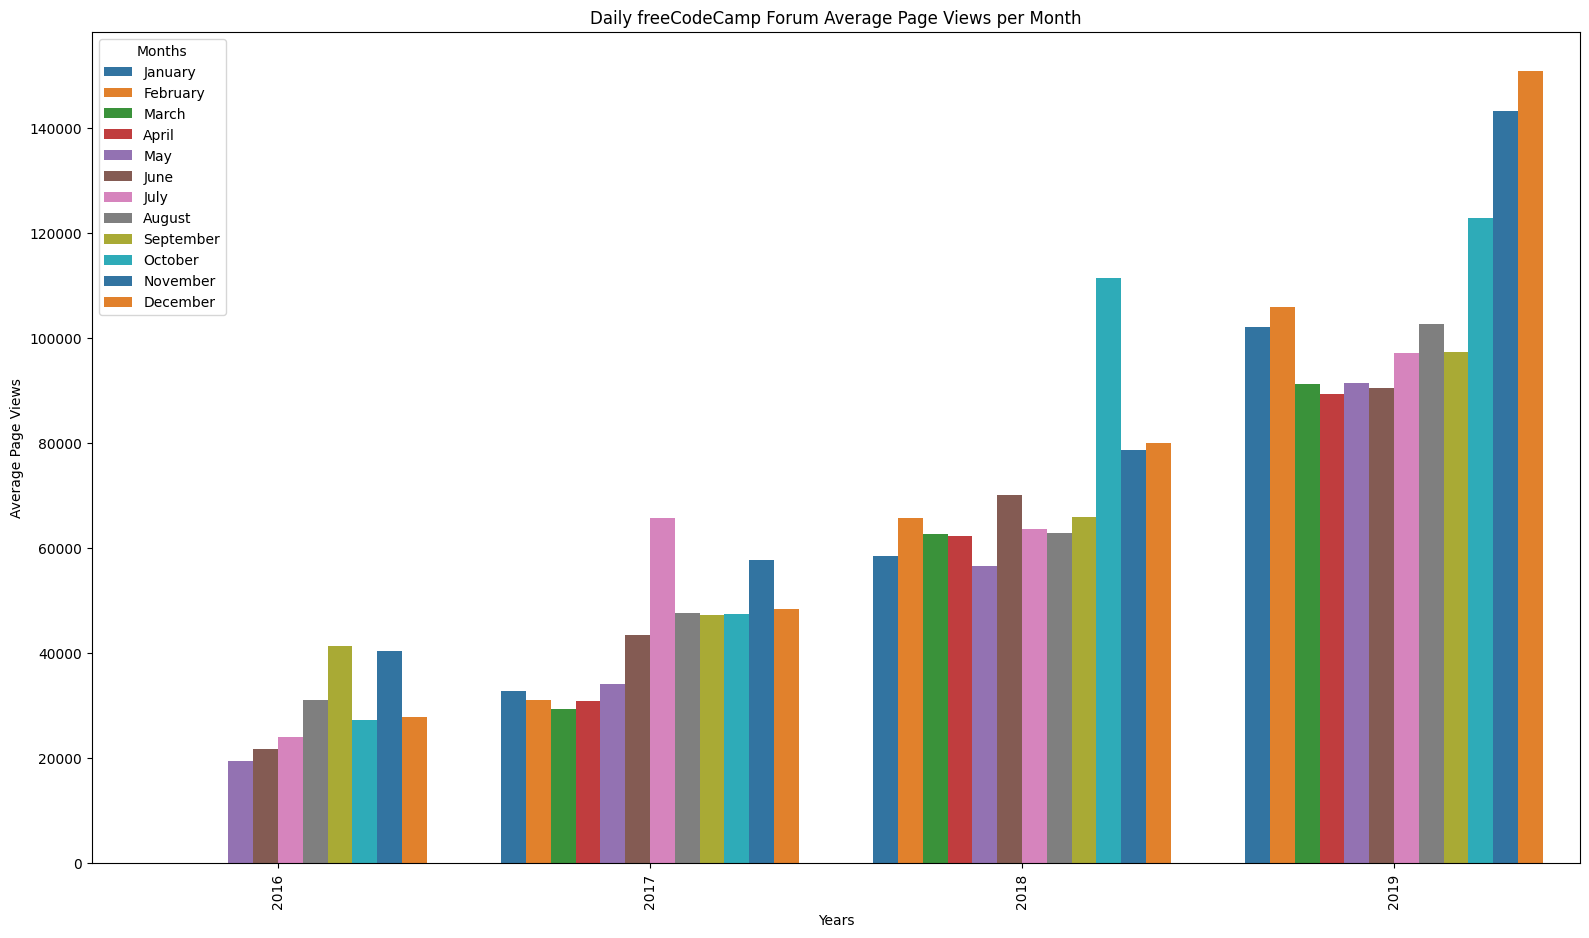

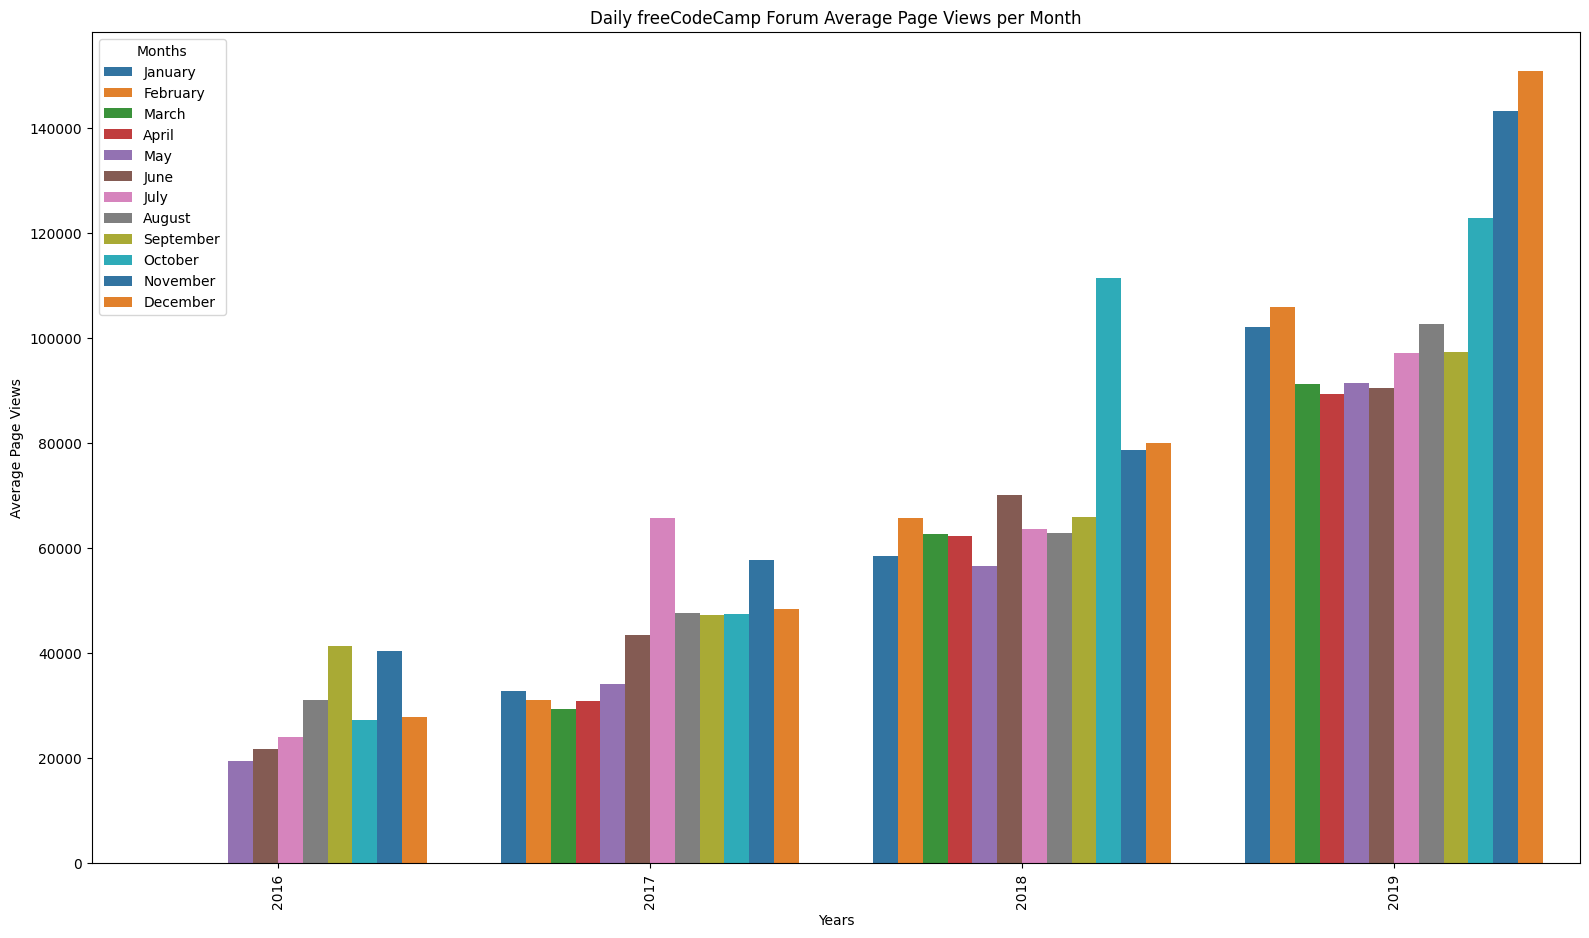

In [91]:
draw_bar_plot()

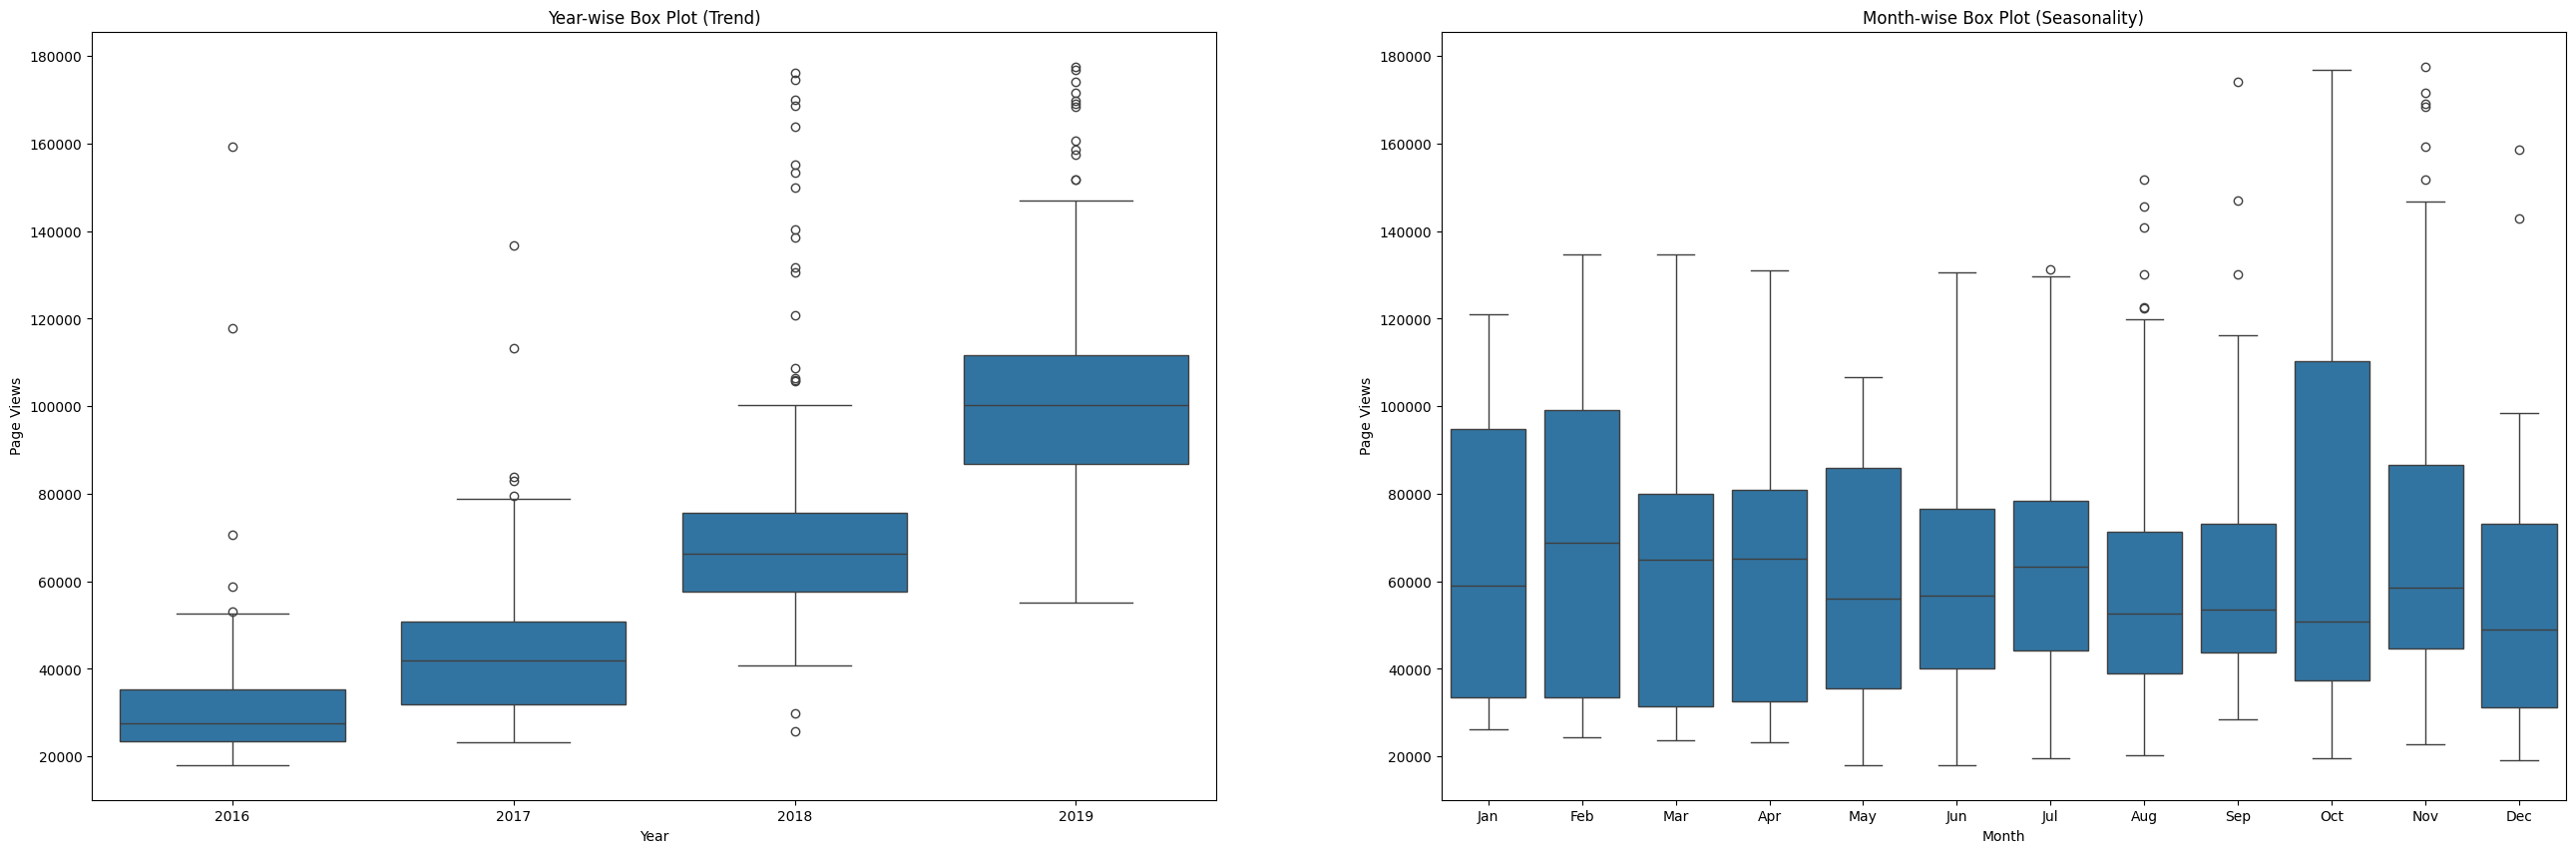

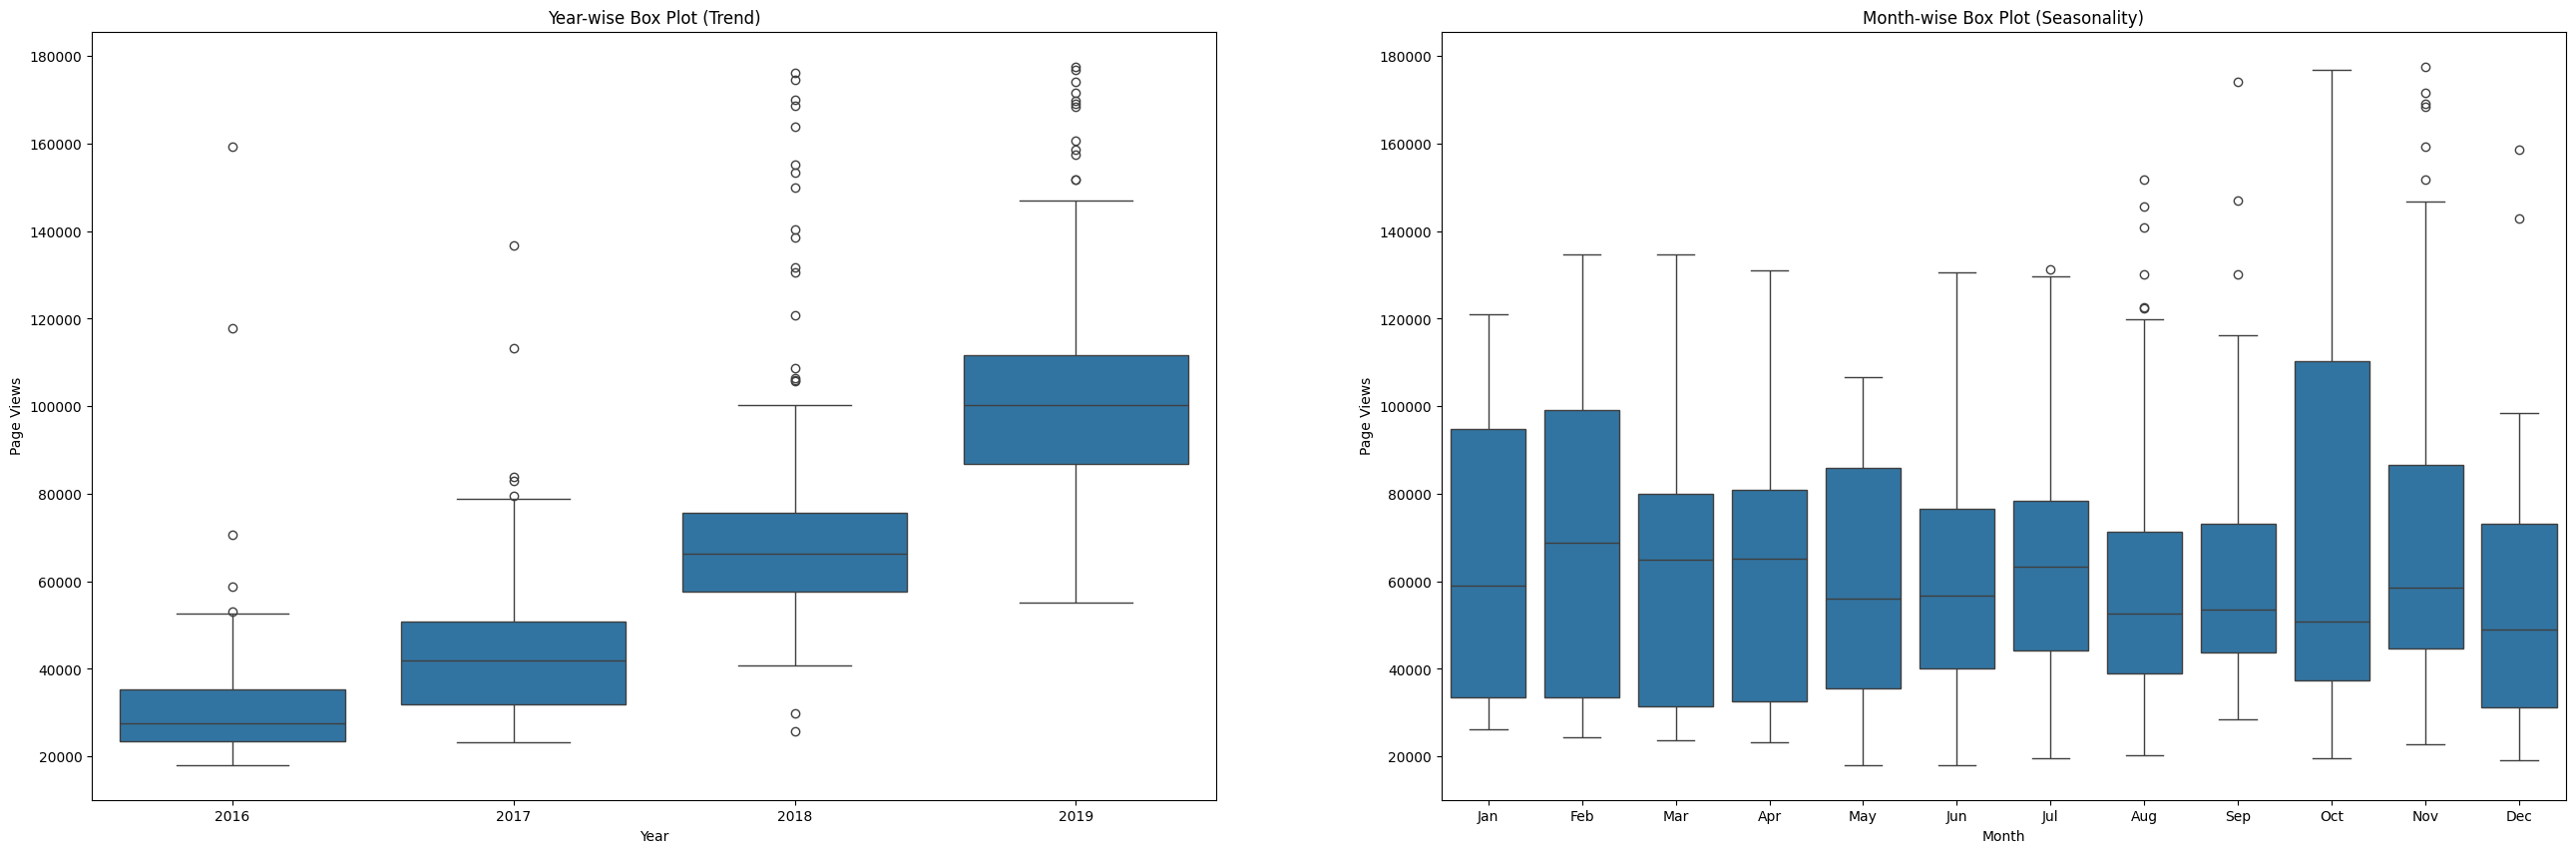

In [92]:
draw_box_plot()